In [93]:
'''
This script scrapes the top 6 discord public lists 
and counts the total number of unique discord channels
'''

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import time
from collections import OrderedDict
import pandas as pd
import string
from random import randint
import locale
from locale import atof

import matplotlib.pyplot as plt
import numpy as np


In [2]:
# The path works because I have moved the "chromedriver" file in /usr/local/bin
browser = webdriver.Chrome(executable_path='/usr/bin/chromedriver')
#Site: https://discordlist.me/
browser.get('https://www.carbonitex.net/discord/bots')


In [41]:
'''
Get number of servers for which bots report the number of servers for.
'''
#Description listed describing the server in the list (includes html)
descriptions = []
#Name of Discord bot
botNames = []
#Number of Discord servers associated with bot
serverNumber = []

html = browser.page_source

soup = BeautifulSoup(html, 'html.parser')
starting_point = soup.find_all('div', {'id' : 'content'})
starting_point = starting_point[0]
bots = starting_point.find_all('div', {'class' : 'bot-card'})


"""
descriptionsA = starting_point.find_all('div', {'class' : 'tab-content'})
botNamesA = starting_point.find_all('div', {'class' : 'box-header'})
serverNumberA = starting_point.find_all('span', {'class' : 'botservercount'})
"""
"""
for a in descriptionsA:
    descriptions.append(a)

for b in botNamesA:
    innerText = b.h2.text
    botNames.append(innerText)

for c in serverNumberA:
    innerNumber = c.text
    innerNumber = innerNumber.replace('Servers: ', '')
    serverNumber.append(innerNumber)
"""

for a in bots:
    descriptionA = a.find('div', {'class' : 'tab-content'})
    botNameA = a.find('div', {'class' : 'box-header'})
    serverNumberA = a.find('span', {'class' : 'botservercount'})

    if serverNumberA:
        descriptions.append(descriptionA)
        
        innerText = botNameA.h2.text
        botNames.append(innerText)
        
        innerNumber = serverNumberA.text
        innerNumber = innerNumber.replace('Servers: ', '')
        serverNumber.append(innerNumber)
        





In [22]:
print len(descriptionsA)
print len(botNamesA)
print len(serverNumber)

151
151
65


In [43]:
print len(descriptions)
print len(botNames)
print len(serverNumber)

65
65
65


In [44]:
#Save file
df = pd.DataFrame(
    {'Name': botNames,
     'Description': descriptions,
     'Count': serverNumber
    })

timestr = time.strftime("%Y%m%d-%H%M%S")
filename = "DiscordBots" + timestr +".csv"

df.to_csv(filename, sep='\t', encoding='utf-8')

In [ ]:
#Load file
df = pd.read_csv("ENTERNAMEHERE.csv", sep='\t', encoding='utf-8')
print df.shape

In [69]:
print df

0       62275.0
1       21418.0
2       17618.0
3       49222.0
4        5165.0
5       29813.0
6        7563.0
7       58761.0
8        9598.0
9        9689.0
10      45007.0
11       4102.0
12      19435.0
13       4944.0
14       2322.0
15       1174.0
16      33578.0
17      72532.0
18      15049.0
19       2289.0
20     190410.0
21       6379.0
22     258214.0
23       9324.0
24      19453.0
25     192018.0
26      34042.0
27       2512.0
28       9307.0
29      17657.0
        ...    
35          1.0
36      44814.0
37    1273357.0
38      95386.0
39      57311.0
40     817535.0
41      31866.0
42       3039.0
43     348874.0
44     839883.0
45     195951.0
46       9174.0
47       8058.0
48      23136.0
49      80587.0
50     485464.0
51        188.0
52       6934.0
53       8500.0
54      44547.0
55       6409.0
56     108520.0
57       5597.0
58      49772.0
59     133270.0
60      17764.0
61      11043.0
62      26402.0
63     173266.0
64       4499.0
Name: Count, dtype: floa

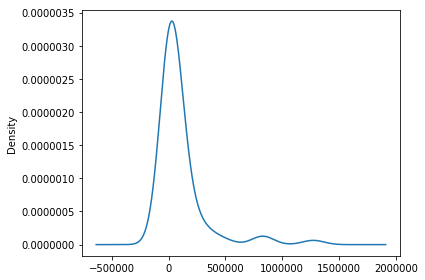

In [68]:
#distrbutiong
df = pd.DataFrame(
    {'Name': botNames,
     'Description': descriptions,
     'Count': serverNumber
    })
#Just get number of servers with bots
#Each bot has a number of 

df = df['Count'].str.replace(',', '')
#print gb
df=df.astype(float)
graph = df.plot(kind='kde',y="Count")
plt.tight_layout()
plt.show()
botsGraph = graph.get_figure()
botsGraph.savefig('CategoriesDiscordServers.png')

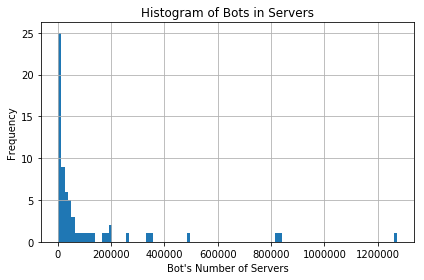

In [152]:
df = pd.DataFrame(
    {'Name': botNames,
     'Description': descriptions,
     'Count': serverNumber
    })

df['Count'] = df['Count'].str.replace(',', '').astype(float)


"""fig, ax = plt.subplots()
#df['Count'].hist()
plt.tight_layout()

ax.boxplot(vert=False)
ax.set_xscale("log")
plt.show()"""
"""series = pd.Series(np.random.normal(size=2000))
fig, ax = plt.subplots()
series.hist(ax=ax, bins=100, bottom=0.1)
ax.set_yscale('log')
plt.show()"""
#plt.xscale('log', basex=1.1)
#graph = df.hist() 
graph = df.hist(bins=100) 
#plt.xscale('log', basex=2)

for ax in graph.flatten():
    ax.set_ylabel("Frequency")
    ax.set_xlabel("Bot's Number of Servers")
    
plt.title('Histogram of Bots in Servers')
plt.tight_layout()
plt.show()
botsGraph = ax.get_figure()
botsGraph.savefig('botsHistogram.png')
#botsGraph.savefig('botsHistogramLogBase2.png')

In [164]:
#Basic statistics
print df.mean()
gb = df["Count"].copy()
gb.sort()
print gb

Count    102106.538462
dtype: float64
35          1.0
51        188.0
15       1174.0
30       1252.0
19       2289.0
14       2322.0
27       2512.0
42       3039.0
11       4102.0
64       4499.0
13       4944.0
4        5165.0
57       5597.0
21       6379.0
55       6409.0
52       6934.0
6        7563.0
47       8058.0
53       8500.0
46       9174.0
28       9307.0
23       9324.0
8        9598.0
9        9689.0
61      11043.0
18      15049.0
2       17618.0
29      17657.0
60      17764.0
12      19435.0
        ...    
32      29316.0
5       29813.0
41      31866.0
16      33578.0
26      34042.0
54      44547.0
36      44814.0
10      45007.0
3       49222.0
58      49772.0
39      57311.0
7       58761.0
0       62275.0
17      72532.0
49      80587.0
38      95386.0
56     108520.0
33     122560.0
59     133270.0
63     173266.0
20     190410.0
25     192018.0
45     195951.0
22     258214.0
34     340934.0
43     348874.0
50     485464.0
40     817535.0
44     839883.0
37

/home/ethanc/.local/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
